In this notebook we compare the Gaussian naif Bayes versus its discrete version in the case of mnist

In [79]:
import numpy as np
import matplotlib.pyplot as plt

#load dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

print("min value = {}, max value = {}".format(np.min(x_train),np.max(x_train)))
print(x_train.shape)
print(x_test.shape)

min value = 0.0, max value = 1.0
(60000, 28, 28)
(10000, 28, 28)


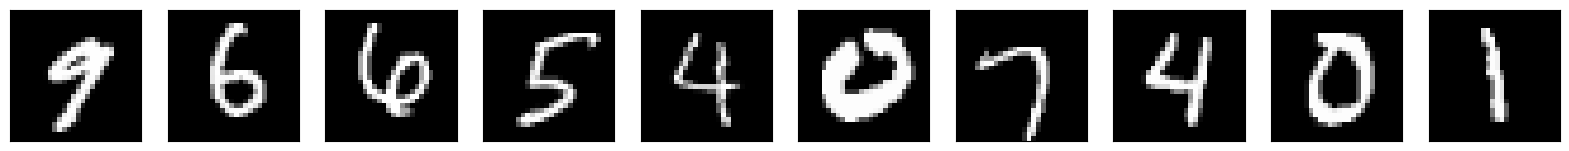

In [80]:
def show_samples(samples):
    n = np.shape(samples)[0]
    plt.figure(figsize=(2*n, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(samples[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

show_samples(x_test[20:30])

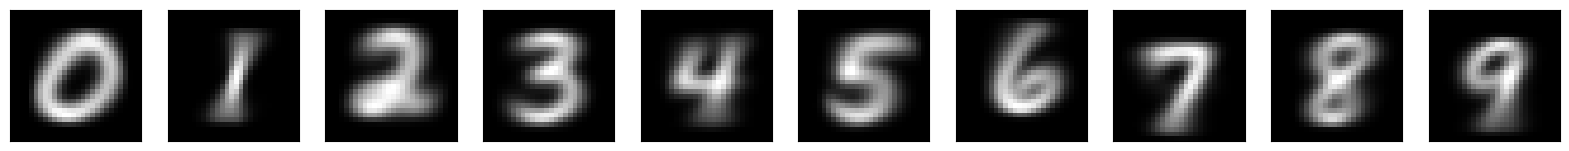

In [81]:
mean_digits = np.zeros((10,28,28))
for i in range(0,10):
  mean_digits[i]= np.mean(x_train[y_train==i], axis=0)
show_samples(mean_digits)

In [82]:
#compute the cardinality of all categories

card = np.zeros((10,))
for i in range(0,10):
    card[i] = np.sum(y_train == i)

print("card = ", card)

card =  [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


We can also plot these frequency as an histogram

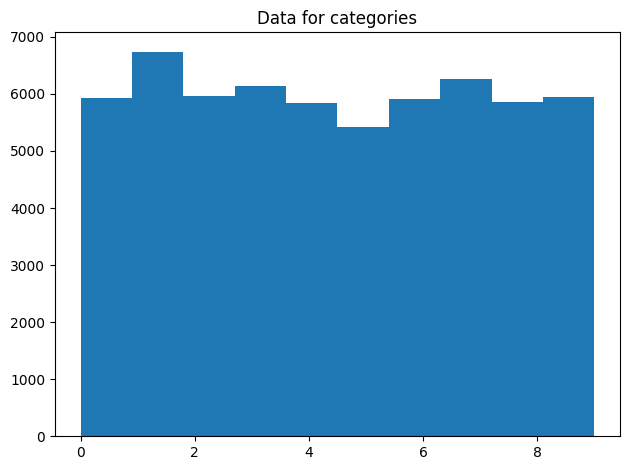

In [83]:
def plot_hist(a,bins=10,title=None):
  plt.figure(tight_layout=True)
  plt.hist(a,bins=bins)
  if title:
    plt.title(title)
  plt.show()

plot_hist(y_train,title="Data for categories")

Now we compute the parameters for Gaussian Naif Bayes technique. We ignore the priors P(Y) since the dataset is sufficiently balaced.

For each category, at each pixel, we compute the mean value and the standard deviation. Using Numpy this is extremely simple.

In [138]:
Mean = np.zeros((10,28,28))
Var = np.zeros((10,28,28))
epsilon = 1e-5 # Small positive value

for i in range(0,10):
  Mean[i] = np.mean(x_train[y_train==i], axis=0)
  Var[i] = np.var(x_train[y_train==i], axis=0)
  Var[i] = np.maximum(Var[i],epsilon)

We now compute, for each category, a multimodal Gaussian distributions for pixels.

In [139]:
def gaussian_density(x,mean,var):
  numerator = np.exp(- (x - mean) ** 2 / (2 * var))
  denominator = np.sqrt(2 * np.pi * var)
  res = numerator / denominator
  return res

In [140]:
def classify(sample):
  probs = []
  for i in range(0,10):
    pixel_probs = gaussian_density(sample,Mean[i],Var[i])
    prob = np.sum(np.log(pixel_probs))
    probs.append(prob)
  return(np.argmax(probs))

<ipython-input-140-2c37ba39d6b3>:5: RuntimeWarning: divide by zero encountered in log
  prob = np.sum(np.log(pixel_probs))


true = 7, predicted = 7
true = 2, predicted = 2
true = 1, predicted = 1
true = 0, predicted = 0
true = 4, predicted = 9


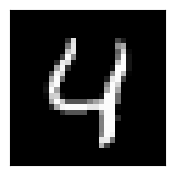

true = 1, predicted = 1
true = 4, predicted = 8


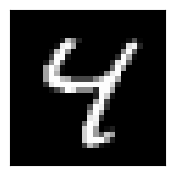

true = 9, predicted = 9
true = 5, predicted = 4


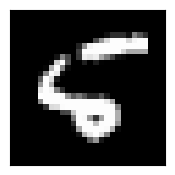

true = 9, predicted = 9
true = 0, predicted = 0
true = 6, predicted = 6
true = 9, predicted = 9
true = 0, predicted = 0
true = 1, predicted = 1
true = 5, predicted = 0


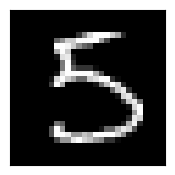

true = 9, predicted = 9
true = 7, predicted = 7
true = 3, predicted = 2


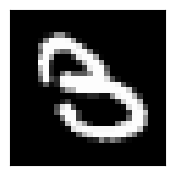

true = 4, predicted = 9


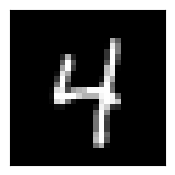

true = 9, predicted = 9
true = 6, predicted = 6
true = 6, predicted = 6
true = 5, predicted = 8


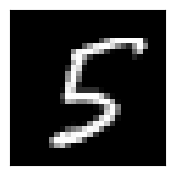

true = 4, predicted = 9


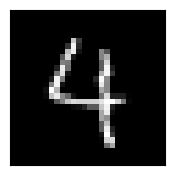

true = 0, predicted = 0
true = 7, predicted = 7
true = 4, predicted = 9


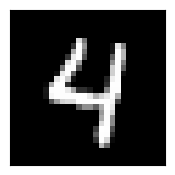

true = 0, predicted = 0
true = 1, predicted = 1
true = 3, predicted = 9


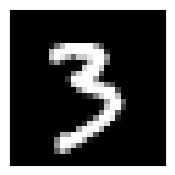

true = 1, predicted = 1
true = 3, predicted = 3
true = 4, predicted = 0


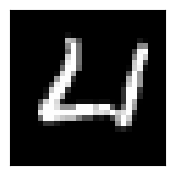

true = 7, predicted = 7
true = 2, predicted = 0


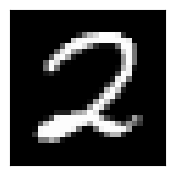

true = 7, predicted = 7
true = 1, predicted = 1
true = 2, predicted = 8


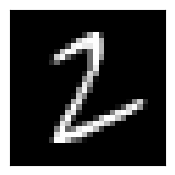

true = 1, predicted = 1
true = 1, predicted = 1
true = 7, predicted = 9


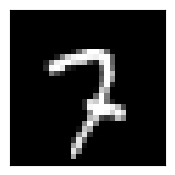

true = 4, predicted = 9


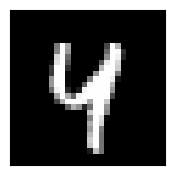

true = 2, predicted = 2
true = 3, predicted = 3
true = 5, predicted = 8


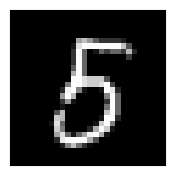

true = 1, predicted = 8


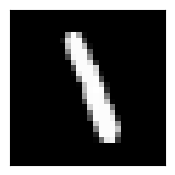

true = 2, predicted = 6


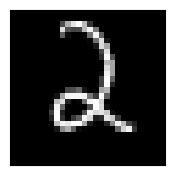

true = 4, predicted = 9


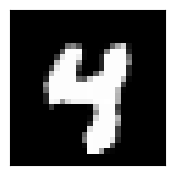

true = 4, predicted = 4
true = 6, predicted = 6
true = 3, predicted = 3
true = 5, predicted = 8


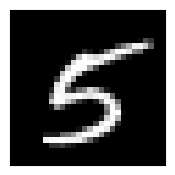

KeyboardInterrupt: Interrupted by user

In [141]:
for i in range(100):
    prediction = classify(x_test[i])
    true = y_test[i]
    print("true = {}, predicted = {}".format(true,prediction))
    if not true == prediction:
        #we show the sample in case of missclassification
        show_samples(np.expand_dims(x_test[i],axis=0))
    x = input()
    if x == 'q':
      break

# Discrete case


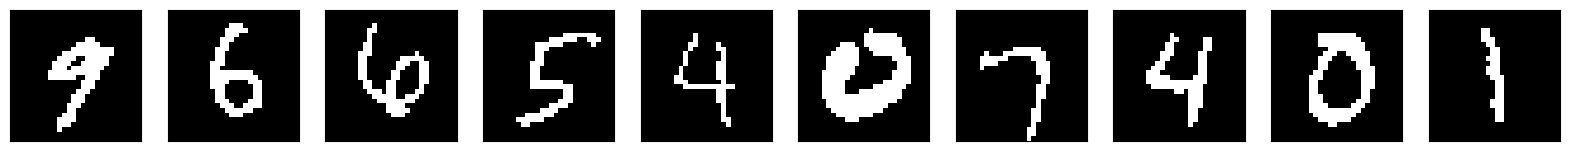

In [142]:
x_train_discr = x_train >.5
x_test_discr = x_test >.5

show_samples(x_test_discr[20:30])

In [146]:
Freq = np.zeros((10,28,28))
for i in range(0,10):
    Freq[i] = np.sum(x_train_discr[y_train == i],axis=0)

#we add one to ensure it is not 0 (we need to compute logs)
Freq += 1  #we assume Freq < card

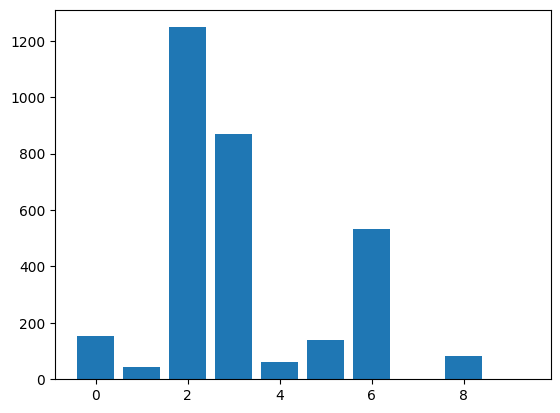

In [151]:
def freq_ij_by_category(i,j):
  freq_ij = Freq[:,i,j]
  plt.bar(np.arange(freq_ij.shape[0]),freq_ij)

freq_ij_by_category(4,10)

In [154]:
#probabilities to be 1
Prob1 = Freq/card[:,None,None]
Prob0 = 1-Prob1
print("Prob1, Prob0 shape = ", Prob1.shape, Prob0.shape)

# passing to logs;
logProb1 = np.log(Prob1)
logProb0 = np.log(Prob0)
assert (logProb1 <= 0).all() & (logProb0 <= 0).all()

Prob1, Prob0 shape =  (10, 28, 28) (10, 28, 28)


In [159]:
def classify(img):
    d_img = img > .5
    #loglikelihood
    logp = np.sum(logProb1 * d_img + logProb0*(1-d_img),axis=(1,2))
    return(np.argmax(logp))

In [ ]:
for i in range(100):
    prediction = classify(x_test[i])
    true = y_test[i]
    print("true = {}, predicted = {}".format(true,prediction))
    if not true == prediction:
        #we show imagae in case of missclassification
        show_samples(np.expand_dims(x_test_discr[i],axis=0))
    x = input()
    if x == 'q':
      break

true = 7, predicted = 7
